<a href="https://colab.research.google.com/github/hyungchanchoi/AlgorithmTrading_pykiwoom/blob/main/samsung_samsung_etf_analy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import os, sys
# from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from sklearn.preprocessing import minmax_scale
from statsmodels.tsa.stattools import coint
today = datetime.today().strftime("%Y%m%d") 
# start = (datetime.today() - timedelta()).strftime("%Y%m%d") 
# print(start, today)
pd.options.display.float_format = '{:.6f}'.format

In [5]:
cd drive/My Drive/algorithmtrading/pair_trading

/content/drive/My Drive/algorithmtrading/pair_trading


In [2]:
def one_day(temp,test_day):
    
    begin = np.where( np.array(temp.index) > str(test_day))[0][0]
    end = np.where( str(test_day+1) > np.array(temp.index) )[0][-1]
    
    if len(temp.iloc[begin:end])==0:
        print(test_day,'는 공휴일입니다.')
    else:
        return temp.iloc[begin:end]

# - 과거 1분단위 데이터 받아오기

In [15]:
now = '20210113'

w = '20210113'

samsung = pd.read_pickle('삼성전자(m)_'+now)
samsung_etf = pd.read_pickle('KODEX 삼성그룹(m)_'+now)

temp =  pd.merge(left = samsung , right = samsung_etf, how = "inner", on = "체결시간")
temp = temp.set_index('체결시간')
temp.columns = ['samsung','volume','samsung_etf','volume']
temp = temp[['samsung','samsung_etf']]

temp['samsung']=pd.to_numeric(temp['samsung'])
temp['samsung_etf']=pd.to_numeric(temp['samsung_etf'])

temp['samsung']=abs(temp['samsung'])
temp['samsung_etf']=abs(temp['samsung_etf'])

temp['samsung_cumret'] = np.log(temp['samsung']/temp['samsung'][0])
temp['samsung_etf_cumret'] = np.log(temp['samsung_etf']/temp['samsung_etf'][0])
temp['samsung_etf'] = temp['samsung_etf'] * 8
temp['spread'] = temp['samsung'] - temp['samsung_etf']
temp['ma60_spread'] = temp['spread'].rolling(window=10, center=False).mean()

temp

,samsung,samsung_etf,samsung_cumret,samsung_etf_cumret,spread,ma60_spread
체결시간,,,,,,
20200102100000,55700,55368,0.000000,0.000000,332,nan
20200102100100,55800,55528,0.001794,0.002886,272,nan
20200102100300,55900,55528,0.003584,0.002886,372,nan
20200102100400,55800,55448,0.001794,0.001444,352,nan
20200102100500,55900,55408,0.003584,0.000722,492,nan
...,...,...,...,...,...,...
20210113151500,89600,87280,0.475375,0.455120,2320,2356.000000
20210113151600,89500,87280,0.474258,0.455120,2220,2338.000000
20210113151700,89500,87240,0.474258,0.454661,2260,2326.000000


In [16]:
y = coint(temp['samsung_etf'][-10000:],temp['samsung'][-10000:])
y

(-2.49942954814431,
 0.2793206682046193,
 array([-3.89753563, -3.33674114, -3.04487419]))

# - 일 단위로 데이터 저장하기 + 당일 수익률 계산

In [17]:
df = {}
calender = []
for date in range(20201224,20210113):
    if 20201231 < date < 20210100:
        continue
    temps = pd.DataFrame()
    temps = one_day(temp,date)
    try:      
        temps['samsung_dayret'] = np.log(temps['samsung']/temps['samsung'][0])
        temps['samsung_etf_dayret'] = np.log(temps['samsung_etf']/temps['samsung_etf'][0])
        temps['spread_cumret'] = temps['samsung_cumret'] -temps['samsung_etf_cumret']
        temps['spread_dayret']= temps['samsung_dayret'] - temps['samsung_etf_dayret'] 
        df[str(date)] = temps
        if len(temps) != 0:
            calender.append(str(date))  
    except:
        pass
calender

20201225 는 공휴일입니다.
20201226 는 공휴일입니다.
20201227 는 공휴일입니다.
20201231 는 공휴일입니다.
20210100 는 공휴일입니다.
20210101 는 공휴일입니다.
20210102 는 공휴일입니다.
20210103 는 공휴일입니다.
20210109 는 공휴일입니다.
20210110 는 공휴일입니다.


['20201224',
 '20201228',
 '20201229',
 '20201230',
 '20210104',
 '20210105',
 '20210106',
 '20210107',
 '20210108',
 '20210111',
 '20210112']

# 그래프 그리기

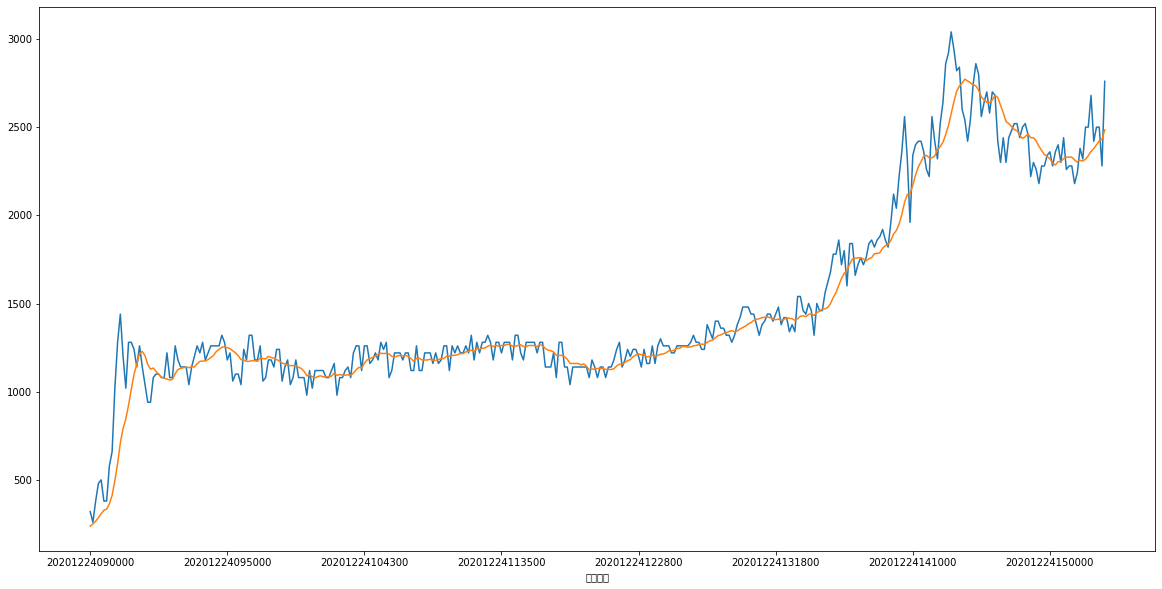

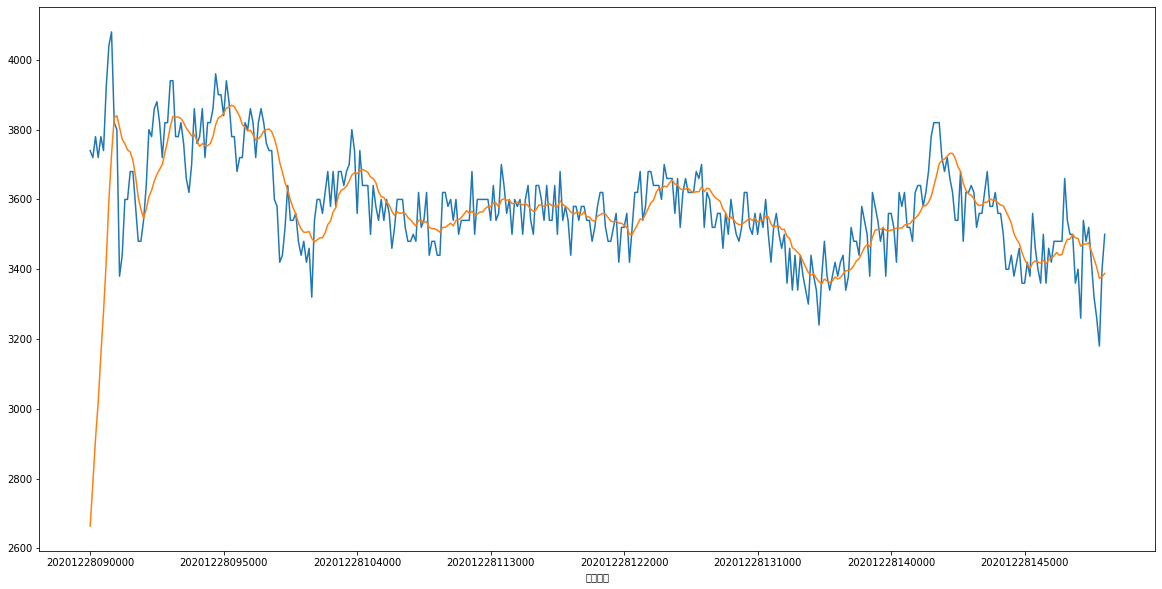

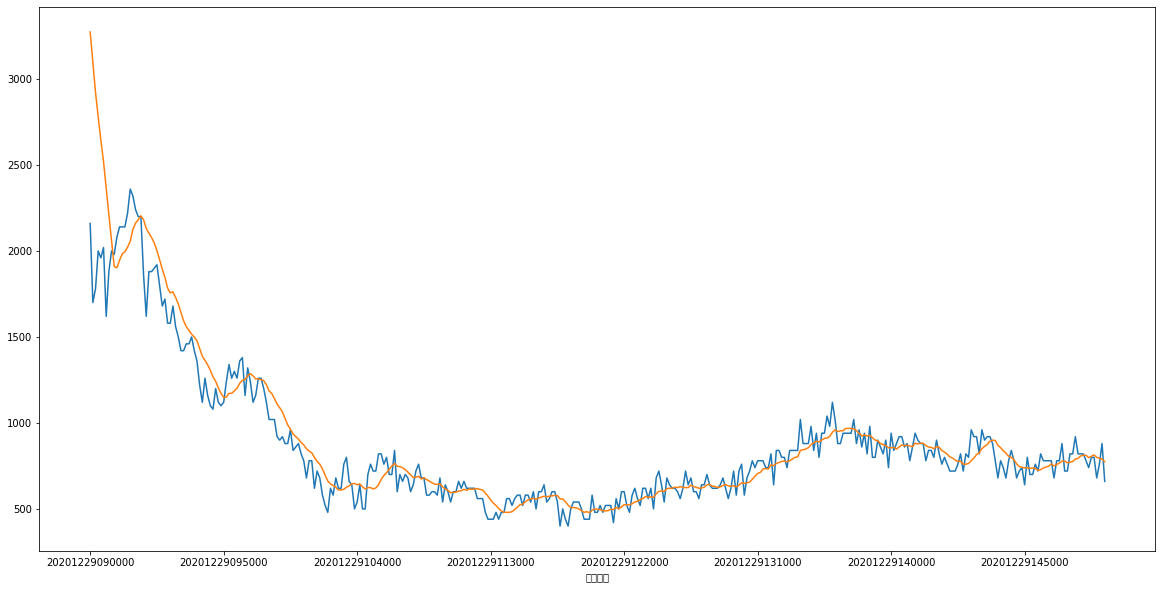

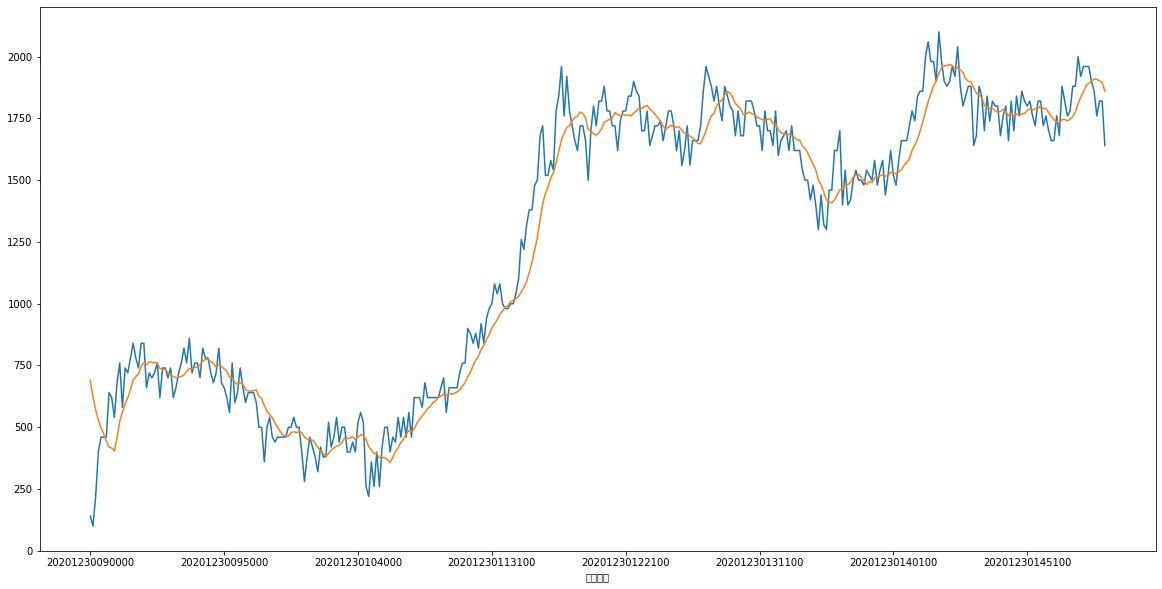

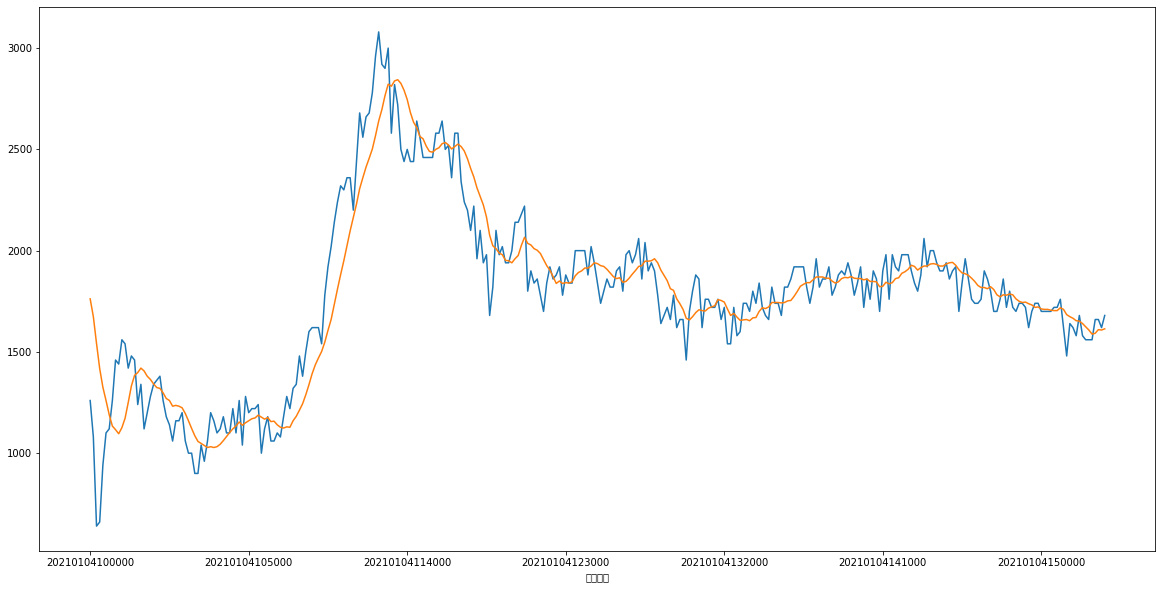

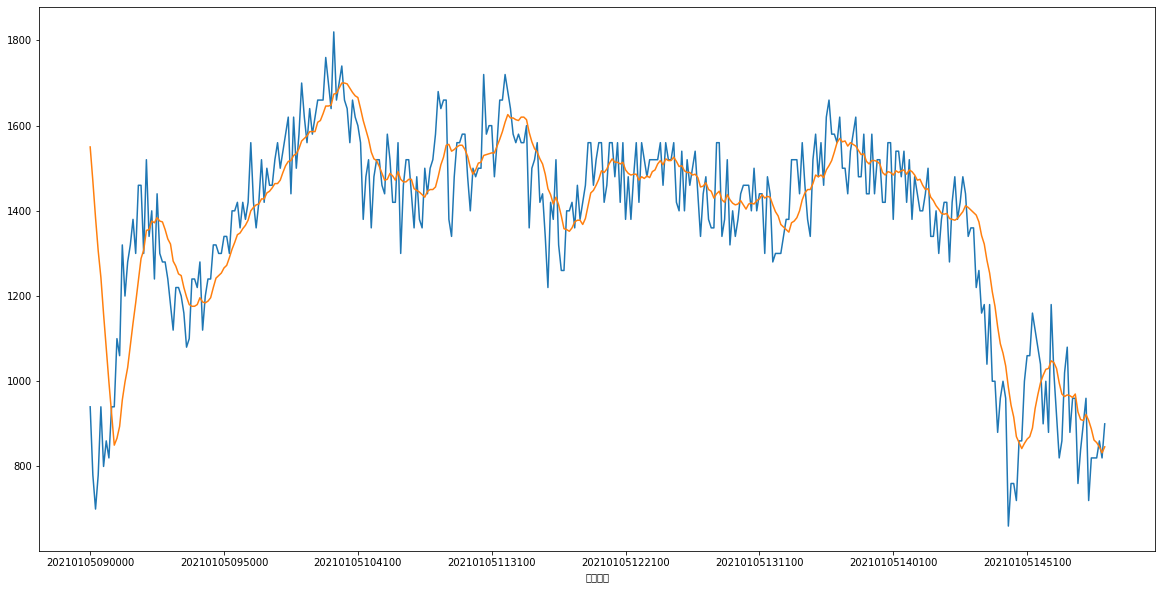

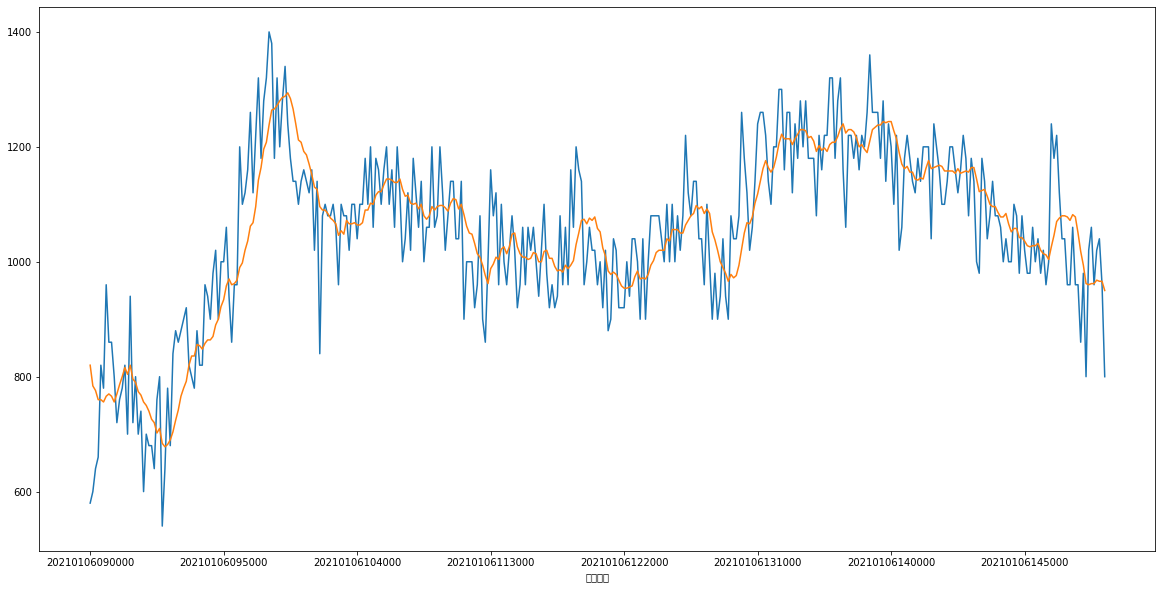

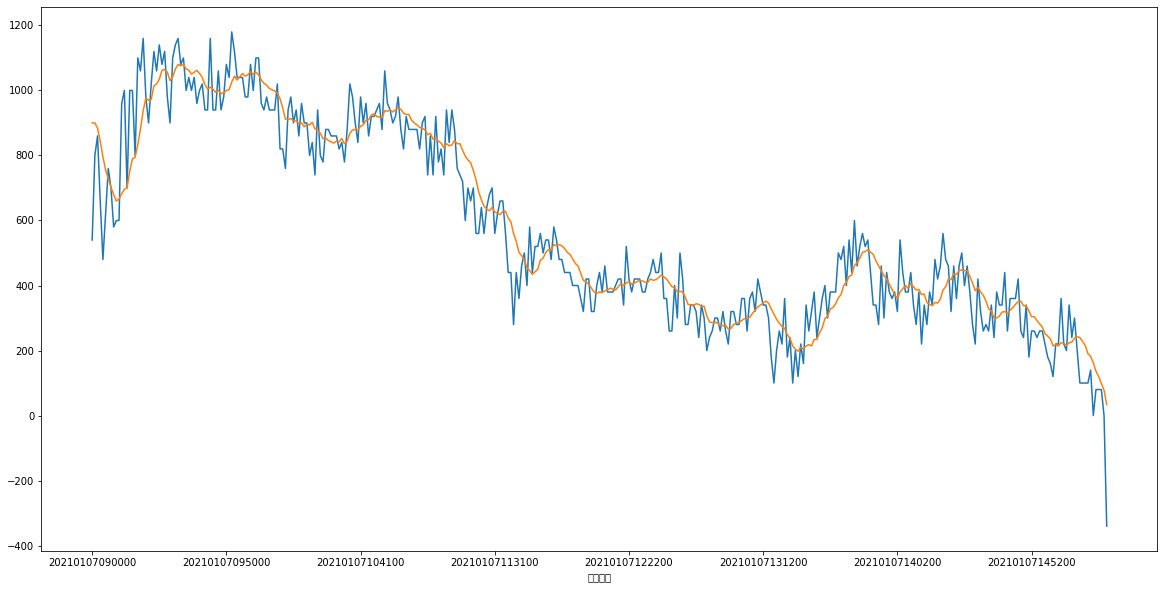

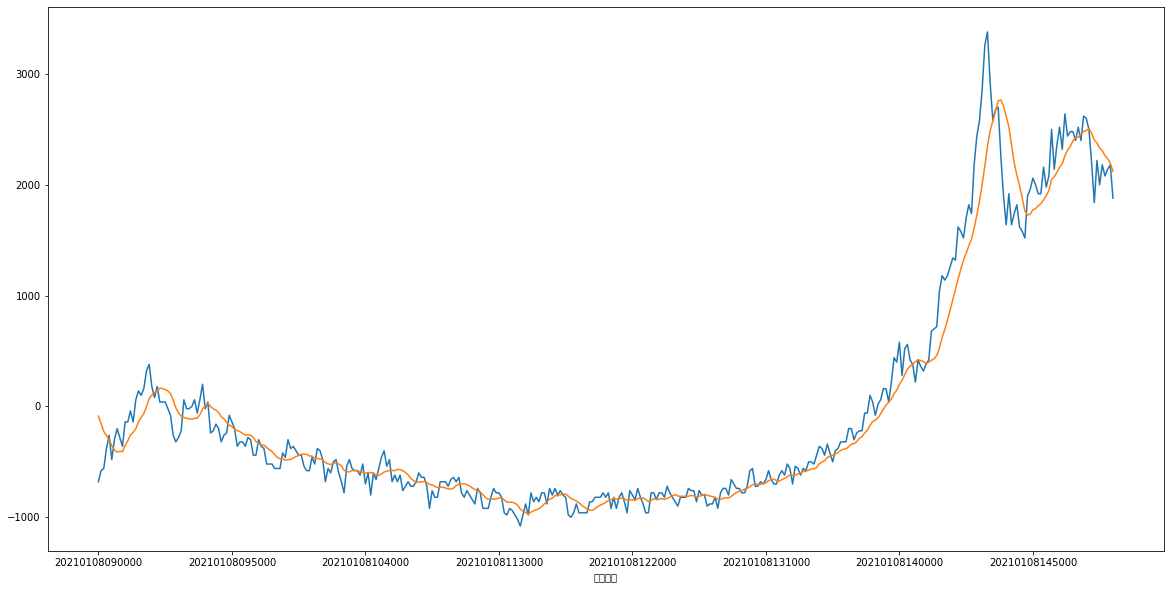

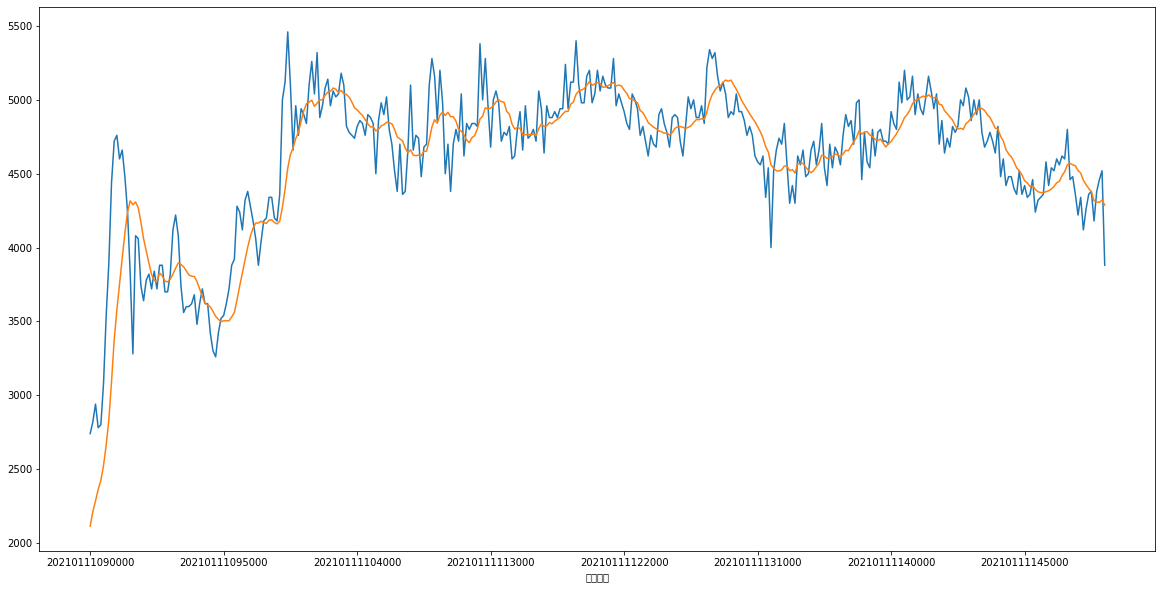

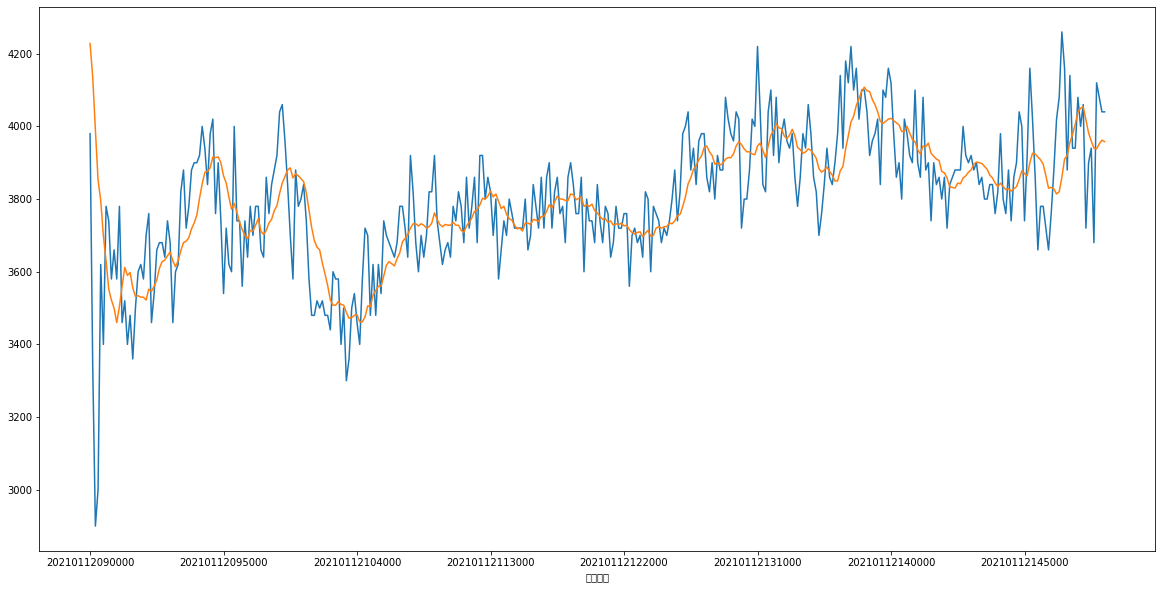

In [18]:
for date in calender:
    plt.rcParams["figure.figsize"] = (20, 10)
    df[date]['spread'].plot()
    df[date]['ma60_spread'].plot()
    # temp_high = df[date]['ma60_spread'] +10
    # temp_low = df[date]['ma60_spread']-10
    # temp_high.plot(linestyle='--')
    # temp_low.plot(linestyle='--')
    # df[date]['samsung'].plot()
    # df[date]['samsung_etf'].plot()
    # plt.axhline((0.0003), color='red', linestyle='--')
    # plt.axhline((-0.0003), color='red', linestyle='--')
    plt.show()

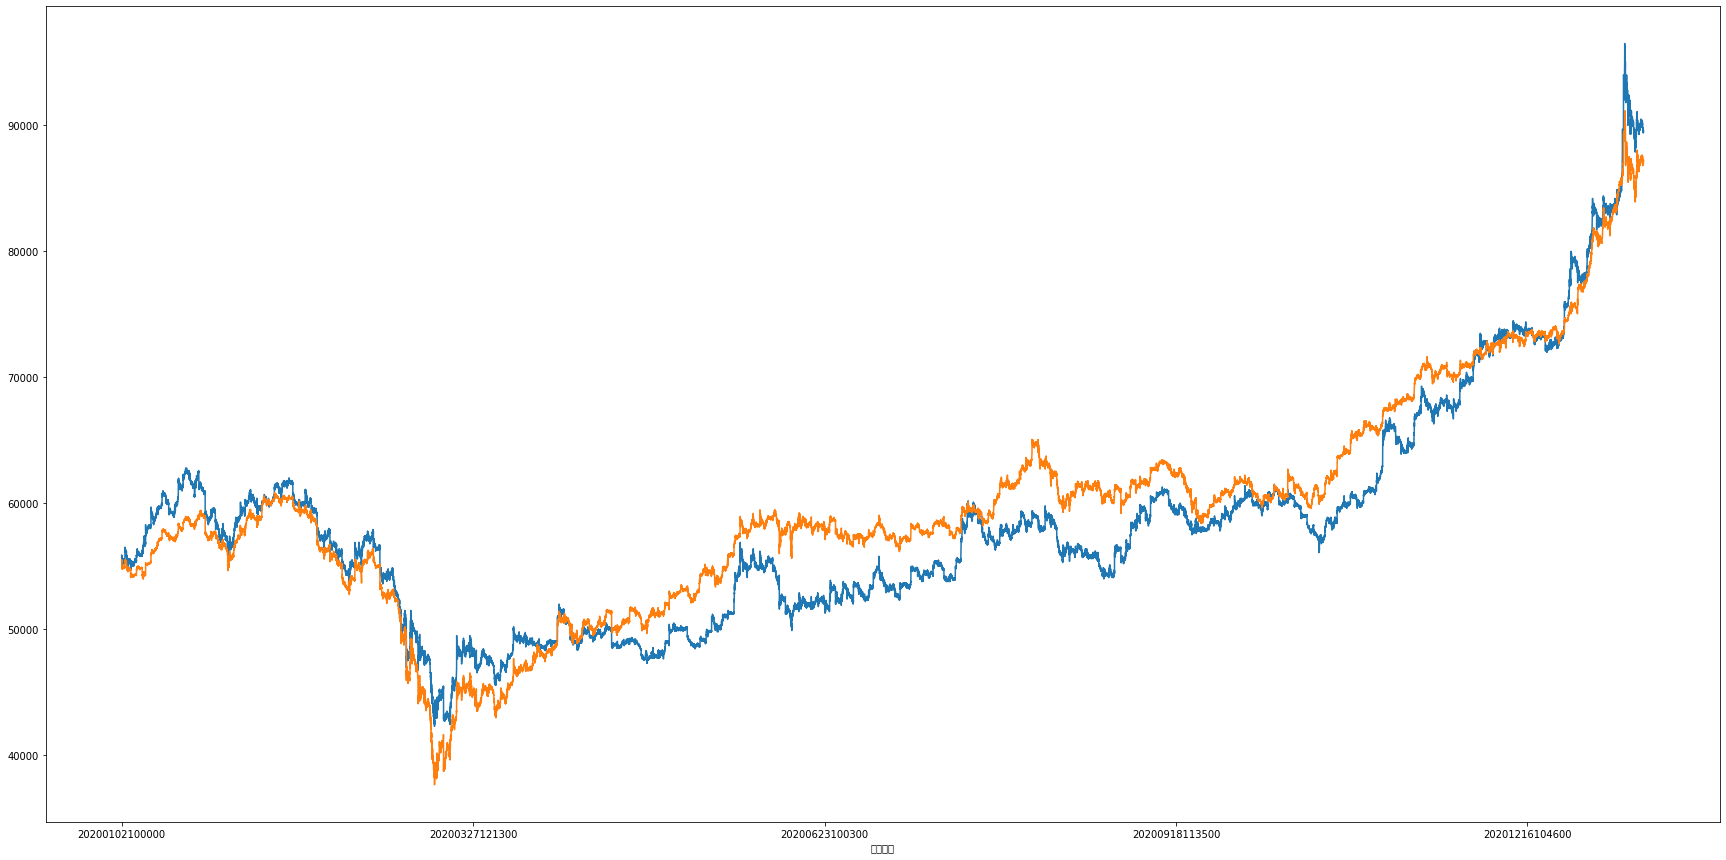

In [13]:
plt.rcParams["figure.figsize"] = (30, 15)
# temp['samsung_cumret'].plot()
# temp['kodex_active_cumret'].plot()
# temp['tiger_active_cumret'].plot()
temp['samsung'].plot()
temp['samsung_etf'].plot()
# temp['ma30'].plot()